In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
import tensorflow as tf

from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras import regularizers
from tensorflow.keras.applications import VGG16

# 체크포인트를 만드는 라이브러리 부분 임포트
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import os
import cv2

In [2]:
#=============================
import random as rn

seed_num = 0
np.random.seed(seed_num)
rn.seed(seed_num)
tf.random.set_seed(seed_num)
#=============================

In [3]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# Check if GPU is available
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("No GPU Found")

# Create a TensorFlow session
with tf.Session() as sess:
    # Run a simple computation on the GPU
    with tf.device('/device:GPU:0'):
        a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
        b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
        c = tf.matmul(a, b)

        # Initialize the variables
        init = tf.global_variables_initializer()

        # Run the initialization
        sess.run(init)

        # Print the result of the computation
        print(sess.run(c))

Instructions for updating:
non-resource variables are not supported in the long term
Default GPU Device: /device:GPU:0
[[22. 28.]
 [49. 64.]]


In [4]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
  # Invalid device or cannot modify virtual devices once initialized.
  pass

In [5]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # 텐서플로가 첫 번째 GPU만 사용하도록 제한
  try:
    tf.config.set_visible_devices(gpus[0], 'GPU')
  except RuntimeError as e:
    # 프로그램 시작시에 접근 가능한 장치가 설정되어야만 합니다
    print(e)

In [6]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_memory_growth(gpus[0], True)
  except RuntimeError as e:
    # 프로그램 시작시에 메모리 증가가 설정되어야만 합니다
    print(e)

In [7]:
# gpus = tf.config.list_physical_devices('GPU')
# if gpus:
#   # 텐서플로가 첫 번째 GPU에 1GB 메모리만 할당하도록 제한
#   try:
#     tf.config.set_logical_device_configuration(
#         gpus[0],
#         [tf.config.LogicalDeviceConfiguration(memory_limit=1024)])
#   except RuntimeError as e:
#     # 프로그램 시작시에 가상 장치가 설정되어야만 합니다
#     print(e)

In [8]:
with_helmet = os.listdir('helmet_generation/With_Helmet/')
without_helmet = os.listdir('helmet_generation/Without_Helmet/')

In [9]:
image_data_label = [(cv2.imread('helmet_generation/With_Helmet/'+i),1) for i in with_helmet] + [(cv2.imread('helmet_generation/Without_Helmet/'+ i),0) for i in without_helmet]

In [10]:
rn.shuffle(image_data_label)

In [11]:
x = [i[0] for i in image_data_label]
y = [i[1] for i in image_data_label]

In [12]:
# x = [cv2.imread('./data/with_helmet_resize/'+i) for i in with_helmet] + [cv2.imread('./data/without_helmet_resize/'+ i) for i in without_helmet]
# len(x)

In [19]:
x = np.array(x, dtype=object)
y = np.array(y, dtype=object)

In [20]:
x

array([array([[[ 94,  94, 101],
               [ 84,  83,  88],
               [ 72,  69,  73],
               ...,
               [ 95, 103, 113],
               [ 92, 101, 110],
               [ 78,  84,  94]],

              [[ 92,  90,  99],
               [ 84,  82,  87],
               [ 73,  68,  74],
               ...,
               [ 70,  77,  86],
               [ 74,  81,  90],
               [ 67,  73,  83]],

              [[ 92,  90,  97],
               [ 86,  83,  89],
               [ 73,  68,  74],
               ...,
               [ 52,  59,  68],
               [ 56,  61,  71],
               [ 52,  60,  68]],

              ...,

              [[140, 149, 178],
               [158, 166, 195],
               [157, 163, 194],
               ...,
               [103, 106, 127],
               [132, 141, 162],
               [115, 120, 140]],

              [[135, 144, 170],
               [153, 163, 189],
               [151, 158, 189],
               ...,
        

In [21]:
x.shape

(20000,)

In [22]:
x = x.astype('float32') / 255

ValueError: setting an array element with a sequence.

In [ ]:
# model = Sequential()

# model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

# model.add(Flatten())
# model.add(Dense(units=4096,activation="relu"))
# model.add(Dense(units=4096,activation="relu"))
# model.add(Dense(units=2, activation="softmax"))

In [ ]:
VGG = VGG16(input_shape=(128, 128, 3), include_top = False, weights = 'imagenet')

VGG.trainable = True

In [ ]:
VGG.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [ ]:
model = Sequential()
model.add(VGG)
model.add(Flatten())
model.add(Dense(units=256,activation="relu"))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_3 (Dense)             (None, 256)               2097408   
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 16,845,121
Trainable params: 16,845,121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

modelpath = './model/'
if not os.path.exists(modelpath) :
    os.mkdir(modelpath)

checkpointer = ModelCheckpoint(filepath = modelpath + 'VGG_16_early.hdf5', monitor = 'val_loss', verbose = 1, save_best_only = True)
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience=10)

history = model.fit(x_train, y_train, validation_data=[x_test, y_test], epochs = 100,  batch_size = 64, callbacks = [checkpointer, early_stopping_callback])

Train on 16000 samples, validate on 4000 samples
Epoch 1/100
16000/16000 [==============================] - ETA: 0s - loss: 0.6434 - acc: 0.6963

c:\Users\SBAUser\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training_v1.py:2332: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates



Epoch 1: val_loss improved from inf to 0.27299, saving model to ./model\VGG_16_early.hdf5
16000/16000 [==============================] - 45s 3ms/sample - loss: 0.6434 - acc: 0.6963 - val_loss: 0.2730 - val_acc: 0.8940
Epoch 2/100
16000/16000 [==============================] - ETA: 0s - loss: 0.3106 - acc: 0.8681
Epoch 2: val_loss improved from 0.27299 to 0.17495, saving model to ./model\VGG_16_early.hdf5
16000/16000 [==============================] - 44s 3ms/sample - loss: 0.3106 - acc: 0.8681 - val_loss: 0.1750 - val_acc: 0.9333
Epoch 3/100
16000/16000 [==============================] - ETA: 0s - loss: 0.1773 - acc: 0.9311
Epoch 3: val_loss improved from 0.17495 to 0.15578, saving model to ./model\VGG_16_early.hdf5
16000/16000 [==============================] - 44s 3ms/sample - loss: 0.1773 - acc: 0.9311 - val_loss: 0.1558 - val_acc: 0.9438
Epoch 4/100
16000/16000 [==============================] - ETA: 0s - loss: 0.1538 - acc: 0.9417
Epoch 4: val_loss improved from 0.15578 to 0.1437

In [ ]:
VGG_model = load_model('./model/VGG_16_early.hdf5')

In [ ]:
VGG_model.evaluate(x_test, y_test)

c:\Users\SBAUser\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training_v1.py:2332: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


[0.024130888986139326, 0.99275]

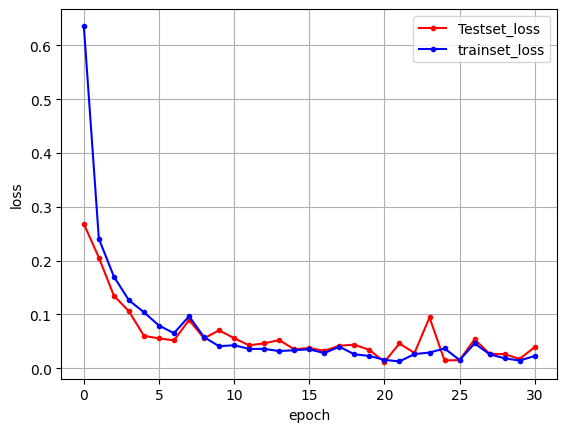

In [ ]:
# 검증셋과 학습셋의 오차 저장

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c='red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c='blue', label = 'trainset_loss')

plt.legend(loc = 'best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedKFold # k-fold 교차검증

In [ ]:
kf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

idx = 1

fold_accuracy = {}

for train, val in kf.split(x,y) :
    print("Fold : #", idx)
    
    VGG = VGG16(input_shape=(128, 128, 3), include_top = False, weights = 'imagenet')

    VGG.trainable = True
        
    model = Sequential()
    model.add(VGG)
    model.add(Flatten())
    model.add(Dense(units=256,activation="relu"))
    model.add(Dense(units=128,activation="relu"))
    model.add(Dense(units=1, activation="sigmoid"))
    
    model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    modelpath = './model/'
    if not os.path.exists(modelpath) :
        os.mkdir(modelpath)

    checkpointer = ModelCheckpoint(filepath = modelpath + f'VGG_16_kfold_{idx}.hdf5', monitor = 'val_loss', verbose = 1, save_best_only = True)
    early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience=10)

    history = model.fit(x[train], y[train], validation_data=[x[val], y[val]], epochs = 100,  batch_size = 64, callbacks = [checkpointer, early_stopping_callback])
    
    best_model = load_model(f'./model/VGG_16_kfold_{idx}.hdf5')
    # 정확도(accuracy)
    print('정확도(accuracy) : ', best_model.evaluate(x[val], y[val])[1])
    
    fold_accuracy[f'{idx}fold'] = best_model.evaluate(x[val], y[val])[1]
        
    print('-'*100)
    idx += 1

fold_accuracy

Fold : # 1
Train on 16000 samples, validate on 4000 samples
Epoch 1/100
16000/16000 [==============================] - ETA: 0s - loss: 0.6353 - acc: 0.7703

c:\Users\SBAUser\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training_v1.py:2332: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates



Epoch 1: val_loss improved from inf to 0.22335, saving model to ./model\VGG_16_kfold_1.hdf5
16000/16000 [==============================] - 44s 3ms/sample - loss: 0.6353 - acc: 0.7703 - val_loss: 0.2234 - val_acc: 0.9143
Epoch 2/100
16000/16000 [==============================] - ETA: 0s - loss: 0.2035 - acc: 0.9218
Epoch 2: val_loss improved from 0.22335 to 0.16169, saving model to ./model\VGG_16_kfold_1.hdf5
16000/16000 [==============================] - 44s 3ms/sample - loss: 0.2035 - acc: 0.9218 - val_loss: 0.1617 - val_acc: 0.9390
Epoch 3/100
16000/16000 [==============================] - ETA: 0s - loss: 0.1502 - acc: 0.9434
Epoch 3: val_loss did not improve from 0.16169
16000/16000 [==============================] - 44s 3ms/sample - loss: 0.1502 - acc: 0.9434 - val_loss: 0.3697 - val_acc: 0.8752
Epoch 4/100
16000/16000 [==============================] - ETA: 0s - loss: 0.1357 - acc: 0.9517
Epoch 4: val_loss improved from 0.16169 to 0.14039, saving model to ./model\VGG_16_kfold_1.h

{'1fold': 0.991,
 '2fold': 0.99525,
 '3fold': 0.99375,
 '4fold': 0.99025,
 '5fold': 0.99175}

In [ ]:
sum(fold_accuracy.values())/5

0.9923999905586243

In [ ]:
df = pd.DataFrame(columns = ['model', 'accuracy(%)', 'image_size', 'eopchs', 'batchsize'])
df.loc[0] = ['VGG_16_KFold', 99.24, (128, 128), 100, 64]
df.loc[1] = ['VGG_16',  99.28, (128, 128), 100, 64]
df


,model,accuracy(%),image_size,eopchs,batchsize
0,VGG_16_KFold,99.24,"(128, 128)",100,64
1,VGG_16,99.28,"(128, 128)",100,64


In [ ]:
df.to_csv('models.csv', index = False)

In [ ]:
for train, val in kf.split(x,y) :
    
    print(train)
    print(val)

[ 3977  3978  3980 ... 19997 19998 19999]
[   0    1    2 ... 4024 4025 4027]
[    0     1     2 ... 19997 19998 19999]
[3977 3978 3980 ... 8032 8033 8037]
[    0     1     2 ... 19997 19998 19999]
[ 7962  7963  7966 ... 12089 12090 12091]
[    0     1     2 ... 19997 19998 19999]
[11904 11909 11914 ... 16015 16016 16018]
[    0     1     2 ... 16015 16016 16018]
[15986 15987 15988 ... 19997 19998 19999]
